1. Importing Libraries 

In [55]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [66]:
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

2. Importing and checking the dataframe 

In [69]:
df = pd.read_csv("index.csv")
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [73]:
# Convert 'date' and 'datetime' to datetime format

df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1133 non-null   datetime64[ns]
 1   datetime     1133 non-null   datetime64[ns]
 2   cash_type    1133 non-null   object        
 3   card         1044 non-null   object        
 4   money        1133 non-null   float64       
 5   coffee_name  1133 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 53.2+ KB


In [77]:
df.shape

(1133, 6)

In [79]:
df.describe()

,date,datetime,money
count,1133,1133,1133.000000
mean,2024-05-19 11:36:29.232127232,2024-05-20 02:38:39.053382912,33.105808
min,2024-03-01 00:00:00,2024-03-01 10:15:50.520000,18.120000
25%,2024-04-14 00:00:00,2024-04-14 10:55:27.406000128,28.900000
50%,2024-05-23 00:00:00,2024-05-23 12:22:06.604999936,32.820000
75%,2024-06-22 00:00:00,2024-06-22 08:39:50.272999936,37.720000
max,2024-07-31 00:00:00,2024-07-31 21:55:16.570000,40.000000
std,NaN,NaN,5.035366


3. Checking null columns 

In [82]:
#Checking null columns

df.isnull().sum()/len(df)*100

date           0.000000
datetime       0.000000
cash_type      0.000000
card           7.855252
money          0.000000
coffee_name    0.000000
dtype: float64

In [84]:
#Since the null value for card column is only 7%, we can consider it negligible and proceed with Analysis 

4. Univariate Analysis

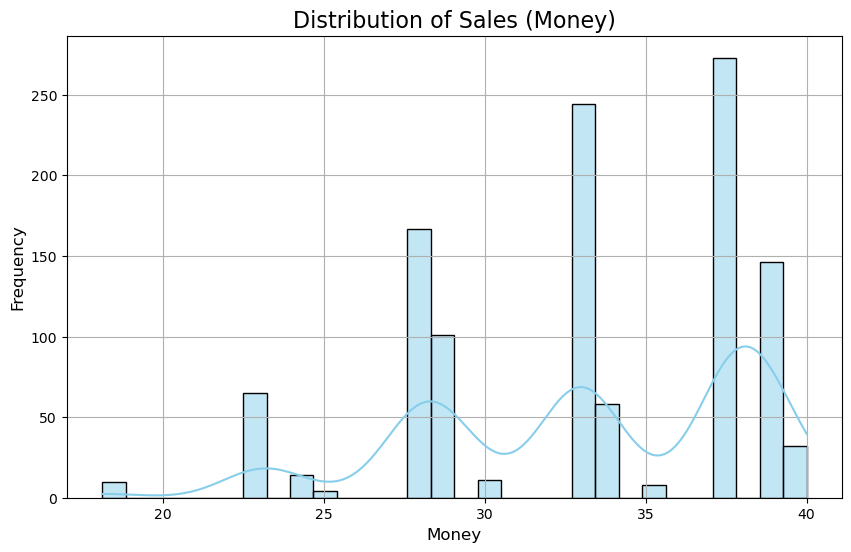

In [87]:
# a. Distribution of the 'money' column
plt.figure(figsize=(10, 6))
sns.histplot(df['money'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Sales (Money)', fontsize=16)
plt.xlabel('Money', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

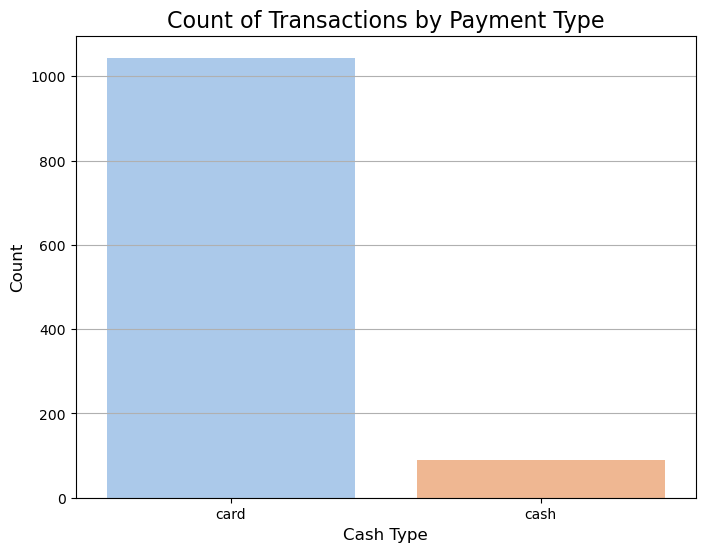

In [89]:
# b. Count of 'cash_type'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='cash_type', palette='pastel')
plt.title('Count of Transactions by Payment Type', fontsize=16)
plt.xlabel('Cash Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y')
plt.show()


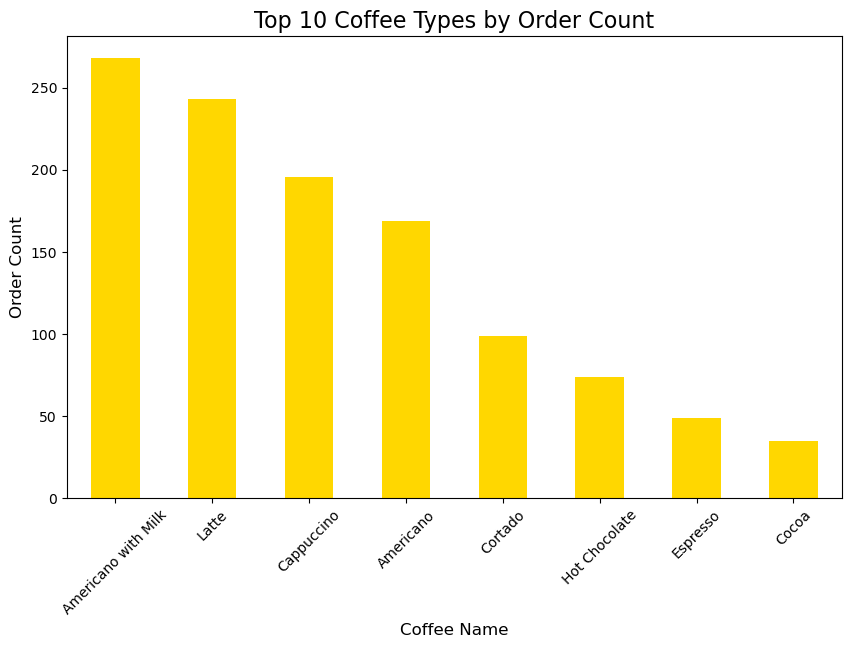

In [91]:
# c. Coffee popularity
plt.figure(figsize=(10, 6))
coffee_popularity =df['coffee_name'].value_counts().head(10)
coffee_popularity.plot(kind='bar', color='gold')
plt.title('Top 10 Coffee Types by Order Count', fontsize=16)
plt.xlabel('Coffee Name', fontsize=12)
plt.ylabel('Order Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

5. Bivariate Analysis

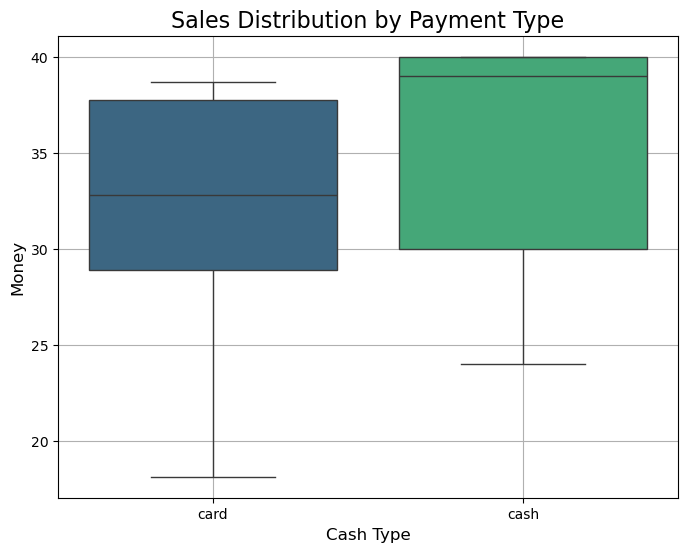

In [94]:

# a. Relationship between 'money' and 'cash_type'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='cash_type', y='money', palette='viridis')
plt.title('Sales Distribution by Payment Type', fontsize=16)
plt.xlabel('Cash Type', fontsize=12)
plt.ylabel('Money', fontsize=12)
plt.grid(True)
plt.show()

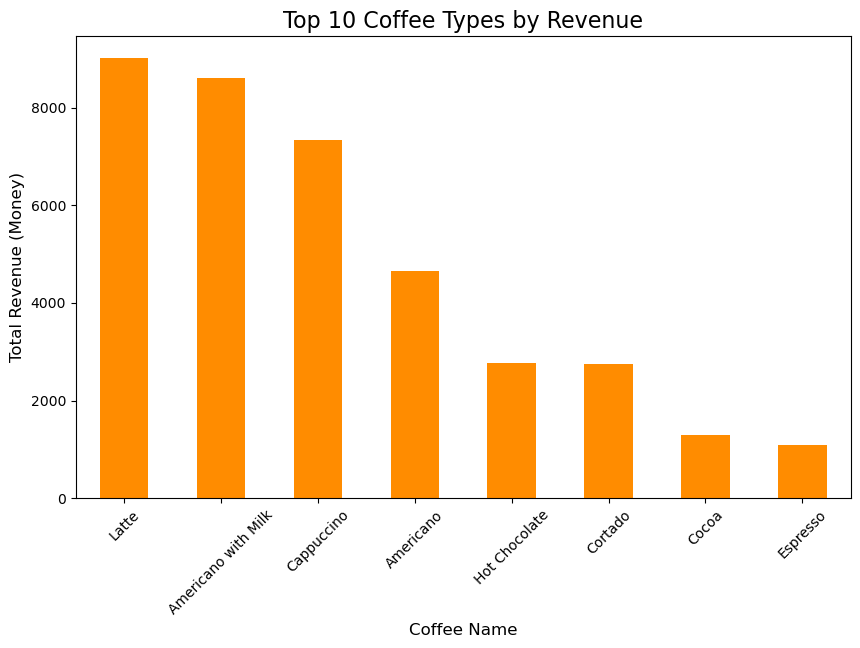

In [96]:
# b. Coffee types contributing to revenue
plt.figure(figsize=(10, 6))
top_coffee_revenue = df.groupby('coffee_name')['money'].sum().sort_values(ascending=False).head(10)
top_coffee_revenue.plot(kind='bar', color='darkorange')
plt.title('Top 10 Coffee Types by Revenue', fontsize=16)
plt.xlabel('Coffee Name', fontsize=12)
plt.ylabel('Total Revenue (Money)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


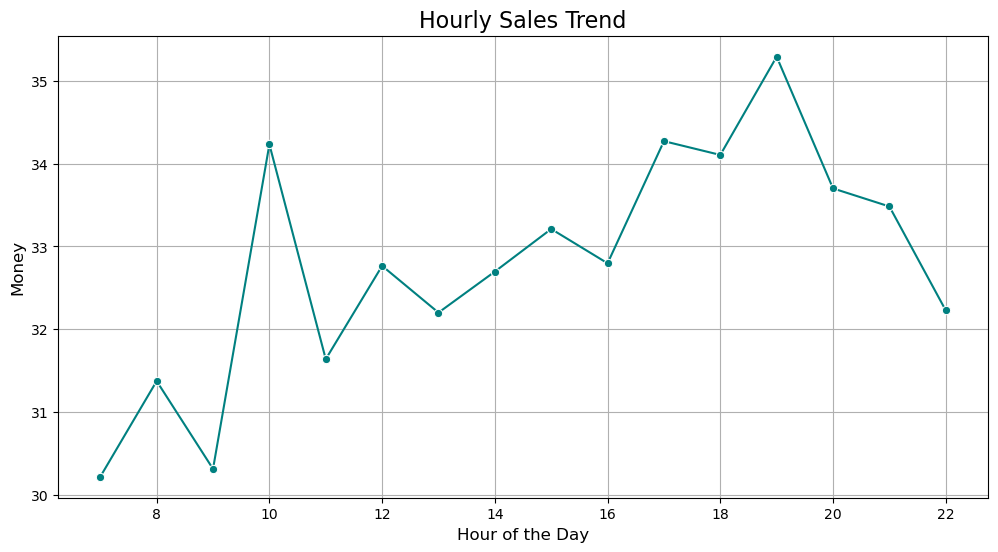

In [98]:
# c. Hourly sales trend
df['hour'] = df['datetime'].dt.hour
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='hour', y='money', ci=None, marker='o', color='teal')
plt.title('Hourly Sales Trend', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Money', fontsize=12)
plt.grid(True)
plt.show()

6. Multivariate Analysis

<Figure size 1200x800 with 0 Axes>

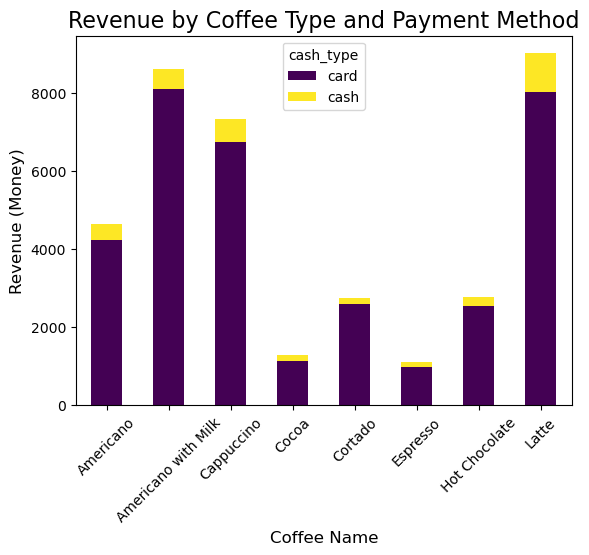

In [101]:
# a. Sales by coffee type and payment type
plt.figure(figsize=(12, 8))
pivot_table = df.pivot_table(values='money', index='coffee_name', columns='cash_type', aggfunc='sum')
pivot_table.head(10).plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Revenue by Coffee Type and Payment Method', fontsize=16)
plt.xlabel('Coffee Name', fontsize=12)
plt.ylabel('Revenue (Money)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


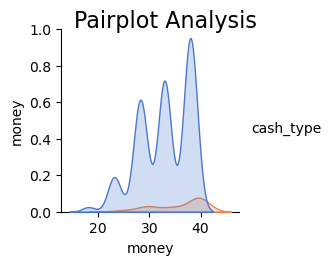

In [103]:
# b. Pairplot to explore relationships between categorical variables and 'money'
sns.pairplot(df, hue='cash_type', diag_kind='kde', palette='muted', vars=['money'])
plt.suptitle('Pairplot Analysis', y=1.02, fontsize=16)
plt.show()

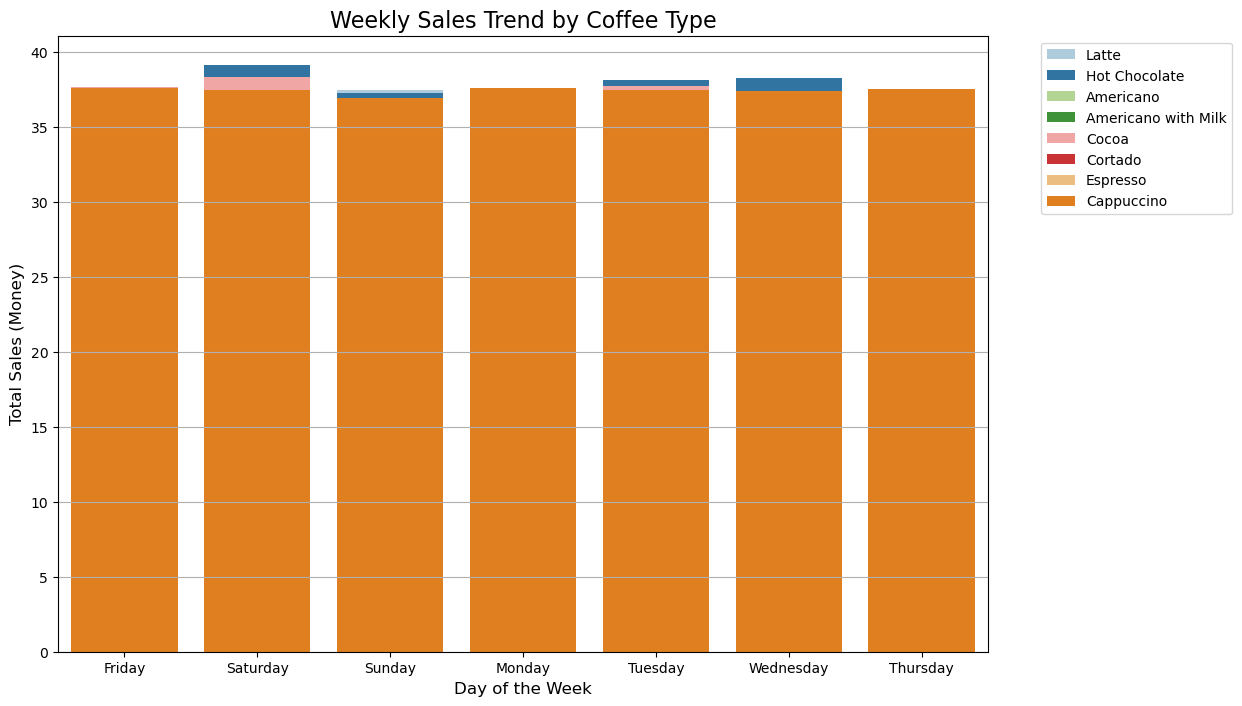

In [105]:
# c. Weekly Sales Trend by Coffee Type
df['day_of_week'] = df['datetime'].dt.day_name()
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='day_of_week', y='money', hue='coffee_name', ci=None, palette='Paired', dodge=False)
plt.title('Weekly Sales Trend by Coffee Type', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Sales (Money)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.show()